In [1]:
def addAllantoinMetabolism(backup):
    model = backup.copy()
    ############
    # Nino-Gonzalez et al 2019
    # Chen et al 2006
    # Ritzel et al 2001
    # Takagi et al 2018
    met1 = Metabolite("S_ALLANTOIN_c",name="S-ALLANTOIN:(S)-(+)-allantoin",
                      formula="C4H6N4O3",compartment="c",
                      charge=0)
    amet1 = Metabolite("aS_ALLANTOIN_c",name="S-ALLANTOIN:(S)-(+)-allantoin",
                      formula="C4H5N4O3",compartment="c",
                      charge=-1)

    rxn1 = Reaction("Allantoin_tx",name="Allantoin uptake")
    rxn1.add_metabolites({model.metabolites.PROTON_e:-1,
                          model.metabolites.PROTON_c:1,met1:0.78,amet1:0.22})
    rxn1.gene_reaction_rule='Glyma.15G066400'
    rxn1.lower_bound = 0
    rxn1.upper_bound = 1000
    ##########
    met2 = Metabolite("S_ALLANTOIN_r",name="(S)-(+)-allantoin",
                      formula="C4H6N4O3",compartment="r",
                      charge=0)
    amet2 = Metabolite("aS_ALLANTOIN_r",name="(S)-(+)-allantoin",
                      formula="C4H5N4O3",compartment="r",
                      charge=-1)


    proton_R = model.metabolites.PROTON_c.copy()
    proton_R.id = "PROTON_r"
    proton_R.compartment = "r"
    rxnProton = Reaction("PROTON_rc",name="ER proton exchange")
    rxnProton.add_metabolites({proton_R:-1,model.metabolites.PROTON_c:1})
    rxnProton.lower_bound = -1000
    rxnProton.upper_bound = 1000

    rxn2 = Reaction("Allantoin_rc",name="Allantoin peroxisome uptake/efflux")
    rxn2.add_metabolites({met1:-0.78,amet1:-0.22,proton_R:-0.12,met2:0.9,amet2:0.1})
    rxn2.lower_bound = -1000
    rxn2.upper_bound = 1000
    ###########
    met3 = Metabolite("ALLANTOATE_r",name="allantoate",
                      formula="C4H7N4O4",compartment="r",
                      charge=-1)

    water_R = model.metabolites.WATER_c.copy()
    water_R.id = "WATER_r"
    water_R.compartment = "r"
    rxnWater = Reaction("H2O_rc",name="ER water exchange")
    rxnWater.add_metabolites({water_R:-1,model.metabolites.WATER_c:1})
    rxnWater.lower_bound = -1000
    rxnWater.upper_bound = 1000


    rxn3 = Reaction("ALLANTOINASE_RXN_r",name="ALLANTOINASE-RXN")
    rxn3.add_metabolites({met2:-0.9,amet2:-0.1,water_R:-1,
                          met3:1,proton_R:0.9})
    rxn3.gene_reaction_rule='Glyma.15G073000 or Glyma.15G072900 or Glyma.13G240500 or Glyma.13G240600'
    #Glyma.15G073000 - cytoplasmic in Uniprot
    #Glyma.15G072900 - cytoplasmic in Uniprot
    #Glyma.13G240500 - cytoplasmic in Uniprot
    #Glyma.13G240600 - cytoplasmic in Uniprot
    #But according to Takagi et al 2018 ER

    rxn3.lower_bound = 0
    rxn3.upper_bound = 1000
    ############
    met4 = Metabolite("CPD0_2298_r",name="CPD0-2298:(S)-ureidoglycine",
                      formula="C3H7N3O3",compartment="r",
                      charge=0)
    amet4 = Metabolite("aCPD0_2298_r",name="CPD0-2298:(S)-ureidoglycine",
                      formula="C3H6N3O3",compartment="r",
                      charge=-1)

    met5 = model.metabolites.AMMONIUM_c.copy()
    met5.id = "AMMONIUM_r"
    met5.compartment = "r"
    rxnNH4 = Reaction("NH4_rc",name="Ammonium ER exchange")
    rxnNH4.add_metabolites({met5:-1,model.metabolites.AMMONIUM_c:1})
    rxnNH4.lower_bound = -1000
    rxnNH4.upper_bound = 1000

    co2_R = model.metabolites.CARBON_DIOXIDE_c.copy()
    co2_R.id = "CARBON_DIOXIDE_r"
    co2_R.compartment = "r"
    rxnCO2 = Reaction("CO2_rc",name="CO2 ER exchange")
    rxnCO2.add_metabolites({co2_R:-1,model.metabolites.CARBON_DIOXIDE_c:1})
    rxnCO2.lower_bound = -1000
    rxnCO2.upper_bound = 1000

    rxn4 = Reaction("ALLANTOATE_DEIMINASE_RXN_r",name="ALLANTOATE-DEIMINASE-RXN:allantoate deiminase")
    rxn4.gene_reaction_rule='Glyma.15G156900 or Glyma.09G050800'
    rxn4.add_metabolites({met3:-1,proton_R:-1.72,water_R:-1,
                          met4:0.72,amet4:0.28,met5:1,co2_R:1})
    #Glyma.15G156900 -ER in Uniprot
    #Glyma.09G050800 -ER in Uniprot
    rxn4.lower_bound = 0
    rxn4.upper_bound = 1000
    #############
    met6 = Metabolite("CPD_1091_r",name="CPD-1091:(S)-ureidoglycolate",
                      formula="C3H5N2O4",compartment="r",
                      charge=-1)

    water_R = model.metabolites.WATER_c.copy()
    water_R.id = "WATER_r"
    water_R.compartment = "r"
    rxnWATER = Reaction("H2O_rc",name="H2O ER exchange")
    rxnWATER.add_metabolites({water_R:-1,model.metabolites.WATER_c:1})
    rxnWATER.lower_bound = -1000
    rxnWATER.upper_bound = 1000

    rxn5 = Reaction("URUR_RXN_r",name="URUR-RXN:(S)-ureidoglycine aminohydrolase")
    rxn5.gene_reaction_rule='Glyma.17G148400 or Glyma.05G066500'
    #Glyma.17G148400
    #Glyma.05G066500
    rxn5.add_metabolites({met4:-0.72,amet4:-0.28,proton_R:-0.28,water_R:-1,
                          met6:1,met5:1})
    rxn5.lower_bound = 0
    rxn5.upper_bound = 1000
    #############
    # met7 = model.metabolites.UREA_c.copy()
    # met7.id = "UREA_r"
    # met7.compartment="r"

    # rxn6 = Reaction("ALLANTOICASE_RXN_r",name="ALLANTOICASE-RXN:allantoicase")
    # rxn6.add_metabolites({met3:-1,model.metabolites.WATER_r:-1,
    #                       met6:1,met7:1})
    # rxn6.lower_bound = 0
    # rxn6.lower_bound = 1000
    #############

    glyox_R = model.metabolites.GLYOX_x.copy()
    glyox_R.id = "GLYOX_r"
    glyox_R.compartment = "r"
    rxnGlyox = Reaction("glyox_rx",name="glyoxylate ER-peroxisome exchange")
    rxnGlyox.add_metabolites({glyox_R:-1,model.metabolites.GLYOX_x:1})

    rxn7 = Reaction("UREIDOGLYCOLATE_HYDROLASE_RXN_r",name="UREIDOGLYCOLATE-HYDROLASE-RXN:ureidoglycolate amidohydrolase")
    rxn7.gene_reaction_rule='Glyma.20G205500 or Glyma.10G184900'
    #Glyma.20G205500 - ER in Uniprot
    #Glyma.10G184900 - ER in Uniprot
    rxn7.add_metabolites({met6:-1,proton_R:-2,water_R:-1,
                          met5:2,co2_R:1,glyox_R:1})
    rxn7.lower_bound = 0
    rxn7.upper_bound = 1000
    #############
    # rxn8 = Reaction("UREIDOGLYCOLATE_LYASE_RXN_r",name="UREIDOGLYCOLATE-LYASE-RXN:ureidoglycolate lyase")
    # rxn8.add_metabolites({met6:-1,
    #                       met7:1,model.metabolites.GLYOX_r:1})
    # rxn8.lower_bound = 0
    # rxn8.lower_bound = 1000
    ############
    model.add_reactions([rxn1,rxn2,rxn3,rxn4,rxn5,rxn7,
                         rxnCO2,rxnGlyox,rxnNH4,rxnProton,rxnWater])
    return model


#################################################################################
# This function is a modified version of cobrapy pfba function			#
#										#
#################################################################################

import logging
from warnings import warn
from itertools import chain

from optlang.symbolics import Zero

from cobra.util import solver as sutil
from cobra.core.solution import get_solution

def pfba_Weighted(model, weightings, fraction_of_optimum=1.0, objective=None, reactions=None):
    """Perform basic pFBA (parsimonious Enzyme Usage Flux Balance Analysis)
    to minimize total flux.
    pFBA [1] adds the minimization of all fluxes the the objective of the
    model. This approach is motivated by the idea that high fluxes have a
    higher enzyme turn-over and that since producing enzymes is costly,
    the cell will try to minimize overall flux while still maximizing the
    original objective function, e.g. the growth rate.
    Parameters
    ----------
    model : cobra.Model
        The model
    fraction_of_optimum : float, optional
        Fraction of optimum which must be maintained. The original objective
        reaction is constrained to be greater than maximal_value *
        fraction_of_optimum.
    objective : dict or model.problem.Objective
        A desired objective to use during optimization in addition to the
        pFBA objective. Dictionaries (reaction as key, coefficient as value)
        can be used for linear objectives.
    reactions : iterable
        List of reactions or reaction identifiers. Implies `return_frame` to
        be true. Only return fluxes for the given reactions. Faster than
        fetching all fluxes if only a few are needed.
    Returns
    -------
    cobra.Solution
        The solution object to the optimized model with pFBA constraints added.
    References
    ----------
    .. [1] Lewis, N. E., Hixson, K. K., Conrad, T. M., Lerman, J. A.,
       Charusanti, P., Polpitiya, A. D., Palsson, B. O. (2010). Omic data
       from evolved E. coli are consistent with computed optimal growth from
       genome-scale models. Molecular Systems Biology, 6,
       390. doi:10.1038/msb.2010.47
    """
    reactions = model.reactions if reactions is None \
        else model.reactions.get_by_any(reactions)
    with model as m:
        add_pfba_Weighted(m, weightings, objective=objective,
                 fraction_of_optimum=fraction_of_optimum)
        m.slim_optimize(error_value=None)
        solution = get_solution(m, reactions=reactions)
    return solution


#################################################################################
# This function is a modified version of cobrapy add_pfba function			#
#										#
#################################################################################

def add_pfba_Weighted(model, weightings, objective=None, fraction_of_optimum=1.0):
    """Add pFBA objective
    Add objective to minimize the summed flux of all reactions to the
    current objective.
    See Also
    -------
    pfba
    Parameters
    ----------
    model : cobra.Model
        The model to add the objective to
    objective :
        An objective to set in combination with the pFBA objective.
    fraction_of_optimum : float
        Fraction of optimum which must be maintained. The original objective
        reaction is constrained to be greater than maximal_value *
        fraction_of_optimum.
    """
    if objective is not None:
        model.objective = objective
    if model.solver.objective.name == '_pfba_objective':
        raise ValueError('The model already has a pFBA objective.')
    sutil.fix_objective_as_constraint(model, fraction=fraction_of_optimum)
    reaction_variables = ((rxn.forward_variable, rxn.reverse_variable)
                          for rxn in model.reactions)
    variables = chain(*reaction_variables)
    model.objective = model.problem.Objective(
        Zero, direction='min', sloppy=True, name="_pfba_objective")
    #print([v for v in variables])
    tempDict = dict()
    for v in variables:
        w = str(v).split("=")[1].replace(" ","").replace("<","")
        found=False
        for rxn in weightings.keys():
            if w.__contains__(rxn):
                #print(v)
                #print(rxn)
                tempDict[v]=weightings[rxn]
                found=True
                break
        if not found:
            #print("Weightings for reaction "+w+" not found, so assuming weighting = 1")
            tempDict[v] = 1
    model.objective.set_linear_coefficients(tempDict)



def remove_metabolite_from_reaction(rxn,mets):
    '''
    This functions removes a list of metabolites from a reaction
    '''
    for met in mets:
        if met in rxn.metabolites.keys():
            coeff = rxn.metabolites.get(met)
            rxn.add_metabolites({met:-1*coeff})
        else:
            print("Metabolite "+met.id+" not present in reaction "+rxn.id)
    return rxn


import pandas as pd



df2 = pd.DataFrame(data={"Light intensity":[1000],
                        "Vc":[27.6936],
                        "Vo":[9.3466],
                        "VPGA":[0.010476],
                        "VT3P":[5.0188],
                        "Vstarch":[1.3221],
                        "Vt_glycerate":[4.6733],
                        "Vt_glycolate":[9.3466]})


from cobra import io,flux_analysis
from cobra.core import Reaction, Metabolite

#import model. Update file name and location in the next line
cobra_model = io.sbml.read_sbml_model("C:\\Users\\sanus\\Scripts\\git\\ODE-FBA\\Data\\PlantCoreMetabolism_v2_0_0.xml")
#cobra_model.solver="glpk"


#no external sucrose or glucose
cobra_model.reactions.get_by_id("Sucrose_tx").lower_bound = 0
cobra_model.reactions.get_by_id("Sucrose_tx").upper_bound = 0
cobra_model.reactions.get_by_id("GLC_tx").lower_bound = 0
cobra_model.reactions.get_by_id("GLC_tx").upper_bound = 0
cobra_model.reactions.get_by_id("NH4_tx").lower_bound=0
cobra_model.reactions.get_by_id("NH4_tx").upper_bound=0
cobra_model.reactions.get_by_id("Nitrate_tx").lower_bound = 0
cobra_model.reactions.get_by_id("Nitrate_tx").upper_bound = 0
cobra_model = addAllantoinMetabolism(cobra_model)

#no external light energy
cobra_model.reactions.get_by_id("Photon_tx").lower_bound = 0
cobra_model.reactions.get_by_id("Photon_tx").upper_bound = 0

#set export of sugars as objective
cobra_model.reactions.get_by_id("Phloem_output_tx").objective_coefficient=0

#add source reaction for TP
rxn = Reaction("GAP_tx",name = "TP source")
rxn.add_metabolites({cobra_model.metabolites.get_by_id("GAP_c"):1})
rxn.upper_bound = 1000
rxn.lower_bound = 0
cobra_model.add_reaction(rxn)


rxn = Reaction("G3P_tx",name = "PGA source")
rxn.add_metabolites({cobra_model.metabolites.get_by_id("G3P_c"):1})
rxn.upper_bound = 1000
rxn.lower_bound = 0
cobra_model.add_reaction(rxn)

#add source reaction for TP
rxn = Reaction("GLYCOLATE_tx",name = "Glycolate source")
rxn.add_metabolites({cobra_model.metabolites.get_by_id("GLYCOLLATE_c"):1})
rxn.upper_bound = 1000
rxn.lower_bound = 0
cobra_model.add_reaction(rxn)

#add source reaction for TP
rxn = Reaction("GLYCERATE_tx",name = "Glycerate sink")
rxn.add_metabolites({cobra_model.metabolites.get_by_id("GLYCERATE_c"):-1})
rxn.upper_bound = 1000
rxn.lower_bound = 0
cobra_model.add_reaction(rxn)

#remove mGS and cGS
cobra_model.reactions.get_by_id("GLUTAMINESYN_RXN_m").lower_bound = 0
cobra_model.reactions.get_by_id("GLUTAMINESYN_RXN_m").upper_bound = 0
cobra_model.reactions.get_by_id("GLUTAMINESYN_RXN_c").lower_bound = 0
cobra_model.reactions.get_by_id("GLUTAMINESYN_RXN_c").upper_bound = 0

#settingup model
model = cobra_model.copy()
model.metabolites.get_by_id("aL_1_PHOSPHATIDYL_GLYCEROL_P_m").remove_from_model()
model.metabolites.get_by_id("aL_1_PHOSPHATIDYL_GLYCEROL_P_p").remove_from_model()

model.reactions.get_by_id("PGPPHOSPHA_RXN_m").add_metabolites({model.metabolites.get_by_id("L_1_PHOSPHATIDYL_GLYCEROL_P_m"):-0.03,
                                                               model.metabolites.get_by_id("PROTON_m"):-0.03})
model.reactions.get_by_id("PHOSPHAGLYPSYN_RXN_m").add_metabolites({model.metabolites.get_by_id("L_1_PHOSPHATIDYL_GLYCEROL_P_m"):0.03,
                                                                   model.metabolites.get_by_id("PROTON_m"):0.03})
model.reactions.get_by_id("PGPPHOSPHA_RXN_p").add_metabolites({model.metabolites.get_by_id("L_1_PHOSPHATIDYL_GLYCEROL_P_p"):-0.03,
                                                               model.metabolites.get_by_id("PROTON_p"):-0.03})
model.reactions.get_by_id("PHOSPHAGLYPSYN_RXN_p").add_metabolites({model.metabolites.get_by_id("L_1_PHOSPHATIDYL_GLYCEROL_P_p"):0.03,
                                                                   model.metabolites.get_by_id("PROTON_p"):0.03})
model.reactions.get_by_id("LPG_biosynthesis_c").add_metabolites({model.metabolites.get_by_id("L_1_PHOSPHATIDYL_GLYCEROL_P_p"):-0.03})

import pandas as pd

df = pd.read_csv("C:\\Users\\sanus\\Scripts\\git\\tissue-specific-FBA-models\\Data\\biomass_soy.csv")

FA=["PALMITATE_p","CPD_9245_p","CPD_17412_p","CPD_17291_p","STEARIC_ACID_p","OLEATE_CPD_p",
    "Octadecadienoate_p","LINOLENIC_ACID_p","ARACHIDIC_ACID_p","CPD_16709_p","DOCOSANOATE_p"]
FACP = {"PALMITATE_p":"Palmitoyl_ACPs_p",
        "CPD_9245_p":"Palmitoleoyl_ACP_p",
        "CPD_17412_p":"hexadecadienoate_ACP_p",
        "CPD_17291_p":"hexadecatrienoate_ACP_p",
        "STEARIC_ACID_p":"Stearoyl_ACPs_p",
        "OLEATE_CPD_p":"Oleoyl_ACPs_p",
        "Octadecadienoate_p":"Octadecadienoyl_ACP_p",
        "LINOLENIC_ACID_p":"Octadecatrienoyl_ACP_p",
        "ARACHIDIC_ACID_p":"Arachidoyl_ACPs_p",
        "CPD_16709_p":"Eicosenoyl_ACP_p",
        "DOCOSANOATE_p":"Behenoyl_ACPs_p"}


PLs = ["ACYL_SN_GLYCEROL_3P_p",
       "L_PHOSPHATIDATE_p","L_PHOSPHATIDATE_m","DIACYLGLYCEROL_p",
       "DIACYLGLYCEROL_r","Triacylglycerols_p","PHOSPHATIDYL_CHOLINE_r",
       "L_1_PHOSPHATIDYL_ETHANOLAMINE_r","L_1_PHOSPHATIDYL_GLYCEROL_p",
       "L_1_PHOSPHATIDYL_GLYCEROL_P_p","L_1_PHOSPHATIDYL_GLYCEROL_P_m",
       "L_1_PHOSPHATIDYL_GLYCEROL_m","2_Lysophosphatidylcholines_r",
       "Lysophosphatidylglycerols_r","CDPDIACYLGLYCEROL_p","CDPDIACYLGLYCEROL_m",
       "D_Galactosyl_12_diacyl_glycerols_p","Galactosyl_galactosyl_diacyl_glycerols_p"]


for met in PLs:
    met=model.metabolites.get_by_id(met)
    met.formula=""

def generateMissingFormula(model,debug=False):
    loop_counter = 0
    former = 0
    for met in model.metabolites:
        if met.formula == "" or met.formula == "NA":
            former = former +1
    latter = 1
    while True:
        loop_counter = loop_counter+1
        if debug:
            print("Loop = "+str(loop_counter))
        former = latter
        for rxn in model.reactions:
            count = 0
            for met in rxn.metabolites:
                if met.formula=="" or met.formula=="NA" or met.formula == None:
                    if met.formula == "NA" or met.formula == None:
                        met.formula = ""
                    count = count + 1
                    coeff = rxn.metabolites[met]
            if count == 1:
                unb = rxn.check_mass_balance()
                eqn = rxn.reaction
                eqn = " "+eqn+" "
                for met in rxn.metabolites.keys():
                    formula = met.formula
                    if formula == None:
                        formula = "0"
                        NF_list.add(rxn.id)
                    eqn=eqn.replace(" "+met.id+" ","("+formula+")")
                if debug:
                    print(eqn)
                    print(unb)
                for met in rxn.metabolites:
                    if met.formula == "":
                        tempForm = ""
                        for a in sorted(unb.keys()):
                            if a=="charge" or round(unb[a],2)==0:
                                continue
                            num = float(abs(unb[a]))/abs(coeff)
                            if str(round(num))==str(num):
                                tempForm = tempForm+a+str(int(round(num)))
                            else:
                                tempForm = tempForm+a+str(num)
                                #print(a)
                                #print(round(num)==num)
                                #print(round(num))
                                #print(num)
                                #print(type(round(num)))
                                #print(type(num))
                        met.formula = tempForm
                        if debug:
                            print(met.id)
                            print(tempForm)
        latter = 0
        for met in model.metabolites:
            if met.formula == "" or met.formula == "NA":
                latter = latter +1
        if former == latter:
            break


leaf_model = model.copy()

k = "leaf"
RXN1 = Reaction("Fatty_acid_mix_"+k)
RXN2 = Reaction("Fatty_acid_ACP_"+k)
tot = 0
for met in df["Unnamed: 0"]:
    #print met
    if met in FA:
        RXN1.add_metabolites({leaf_model.metabolites.get_by_id(met):-1*float(df[df["Unnamed: 0"]==met][k])})
        RXN2.add_metabolites({leaf_model.metabolites.get_by_id(FACP[met]):-1*float(df[df["Unnamed: 0"]==met][k])})
        tot = tot+(float(df[df["Unnamed: 0"]==met][k]))
if tot==0:
    RXN1.add_metabolites({leaf_model.metabolites.PALMITATE_p:-1})
    RXN2.add_metabolites({leaf_model.metabolites.Palmitoyl_ACPs_p:-1})
    tot = 1
RXN1.add_metabolites({leaf_model.metabolites.Fatty_Acids_p:tot})
RXN1.lower_bound = 0
RXN1.upper_bound = 1000
leaf_model.add_reaction(RXN1)

RXN2.add_metabolites({leaf_model.metabolites.Fatty_acyl_ACP_p:tot})
RXN2.lower_bound = 0
RXN2.upper_bound = 1000
leaf_model.add_reaction(RXN2)


generateMissingFormula(leaf_model)

rxn = Reaction("Biomass_leaf_tx")
for met in df["Unnamed: 0"]:
    if met in FA or float(df[df["Unnamed: 0"]==met][k])==0:
        continue
    rxn.add_metabolites({leaf_model.metabolites.get_by_id(met):-1*float(df[df["Unnamed: 0"]==met][k])})

rxn.lower_bound = 0
rxn.upper_bound = 1000
leaf_model.add_reaction(rxn)

rxn.objective_coefficient=1


cobra_model = leaf_model.copy()


cobra_model.reactions.get_by_id("Pi_ec").lower_bound = -1000
cobra_model.reactions.get_by_id("Pi_ec").upper_bound = 1000

#add malate and citrate accumulation reactions
rxn = Reaction("MAL_v_accumulation")
rxn.add_metabolites({cobra_model.metabolites.MAL_v:-0.7,cobra_model.metabolites.aMAL_v:-0.3})
rxn.lower_bound = -1000
rxn.upper_bound = 1000
cobra_model.add_reaction(rxn)
rxn = Reaction("CIT_v_accumulation")
rxn.add_metabolites({cobra_model.metabolites.CIT_v:-0.5,cobra_model.metabolites.aCIT_v:-0.5})
rxn.lower_bound = -1000
rxn.upper_bound = 1000
cobra_model.add_reaction(rxn)




C:\ProgramData\Anaconda3\lib\site-packages\pandas\compat\_optional.py:106: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '0+unknown' currently installed).
  warnings.warn(msg, UserWarning)


Academic license - for non-commercial use only - expires 2021-08-06
Using license file C:\Users\sanus\gurobi.lic
Read LP format model from file C:\Users\sanus\AppData\Local\Temp\tmpfvfei9ot.lp
Reading time = 0.02 seconds
: 861 rows, 1784 columns, 8924 nonzeros
Read LP format model from file C:\Users\sanus\AppData\Local\Temp\tmp3t56nc0b.lp
Reading time = 0.02 seconds
: 874 rows, 1814 columns, 9018 nonzeros
Read LP format model from file C:\Users\sanus\AppData\Local\Temp\tmp1qa0a3_a.lp
Reading time = 0.02 seconds
: 872 rows, 1814 columns, 9004 nonzeros
Read LP format model from file C:\Users\sanus\AppData\Local\Temp\tmpsisyxr_2.lp
Reading time = 0.02 seconds
: 872 rows, 1820 columns, 9132 nonzeros


C:\ProgramData\Anaconda3\lib\site-packages\cobra\core\metabolite.py:103: UserWarning: 17.75575928966914 is not an integer (in formula C17.75575928966914H32.755759289669136O0.15472810256968023X1.0)
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\cobra\core\metabolite.py:103: UserWarning: 32.755759289669136 is not an integer (in formula C17.75575928966914H32.755759289669136O0.15472810256968023X1.0)
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\cobra\core\metabolite.py:103: UserWarning: 0.15472810256968023 is not an integer (in formula C17.75575928966914H32.755759289669136O0.15472810256968023X1.0)
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\cobra\core\metabolite.py:103: UserWarning: 17.75575928966914 is not an integer (in formula C17.75575928966914H32.86279801549386O2.0)
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\cobra\core\metabolite.py:103: UserWarning: 32.86279801549386 is not an integer (in formula C17.75575928966914H32.86279801549386O2.0)
  warn(
C:\ProgramData

In [2]:
temp = cobra_model.copy()

PPFD = df2["Light intensity"][0]
#constrain maintenace
ATPase = (0.0049*PPFD) + 2.7851
temp.reactions.get_by_id("ATPase_tx").lower_bound = ATPase
temp.reactions.get_by_id("ATPase_tx").upper_bound = ATPase
temp.reactions.get_by_id("NADPHoxc_tx").lower_bound = ATPase/9
temp.reactions.get_by_id("NADPHoxc_tx").upper_bound = ATPase/9
temp.reactions.get_by_id("NADPHoxp_tx").lower_bound = ATPase/9
temp.reactions.get_by_id("NADPHoxp_tx").upper_bound = ATPase/9
temp.reactions.get_by_id("NADPHoxm_tx").lower_bound = ATPase/9
temp.reactions.get_by_id("NADPHoxm_tx").upper_bound = ATPase/9

#constraint TP flux
temp.reactions.get_by_id("GAP_tx").lower_bound = df2["VT3P"][0]
temp.reactions.get_by_id("GAP_tx").upper_bound = df2["VT3P"][0]
temp.reactions.get_by_id("G3P_tx").lower_bound = df2["VPGA"][0]
temp.reactions.get_by_id("G3P_tx").upper_bound = df2["VPGA"][0]

#constraint glycollate and glycerate fluxes flux
temp.reactions.get_by_id("GLYCOLATE_tx").lower_bound = df2["Vt_glycolate"][0]
temp.reactions.get_by_id("GLYCOLATE_tx").upper_bound = df2["Vt_glycolate"][0]
temp.reactions.get_by_id("GLYCERATE_tx").lower_bound = df2["Vt_glycerate"][0]
temp.reactions.get_by_id("GLYCERATE_tx").upper_bound = df2["Vt_glycerate"][0]

#temp.reactions.get_by_id("NrefixationCostbypass").lower_bound = df270["Vt_glycolate"][i]
#temp.reactions.get_by_id("NrefixationCostbypass").upper_bound = df270["Vt_glycolate"][i]
#temp.reactions.get_by_id("NrefixationEnergy").lower_bound = df270["Vt_glycerate"][i]
#temp.reactions.get_by_id("NrefixationEnergy").upper_bound = df270["Vt_glycerate"][i]
temp.reactions.get_by_id("2PGADEHYDRAT_RXN_p").lower_bound = 0
temp.reactions.get_by_id("2PGADEHYDRAT_RXN_p").upper_bound = 0

temp.reactions.get_by_id("G6P_Pi_pc").lower_bound=0
temp.reactions.get_by_id("G6P_Pi_pc").upper_bound=0

temp.reactions.get_by_id("MAL_v_accumulation").lower_bound = 0.0698903487288*df2["Vstarch"][0]
temp.reactions.get_by_id("MAL_v_accumulation").upper_bound = 0.0698903487288*df2["Vstarch"][0]

temp.reactions.get_by_id("CIT_v_accumulation").lower_bound = -0.056884259879*df2["Vstarch"][0]
temp.reactions.get_by_id("CIT_v_accumulation").upper_bound = -0.056884259879*df2["Vstarch"][0]




for rxn in cobra_model.reactions:
    if rxn.lower_bound == -1000:
        rxn.lower_boudn = -3000
    if rxn.upper_bound == 1000:
        rxn.upper_bound = 3000



#ADD ATP source reaction in FBA to represent ATP from JATPase
JATPase = 3.6166
rxn = Reaction("ATP_source_from_ODE")
rxn.add_metabolites({temp.metabolites.get_by_id("ADP_p"):-0.8,
                     temp.metabolites.get_by_id("aADP_p"):-0.2,
                     temp.metabolites.get_by_id("Pi_p"):-1,
                     temp.metabolites.get_by_id("PROTON_p"):-0.9,
                     temp.metabolites.get_by_id("ATP_p"):0.9,
                     temp.metabolites.get_by_id("aATP_p"):0.1,
                     temp.metabolites.get_by_id("WATER_p"):1})
rxn.lower_bound = JATPase

rxn.upper_bound = JATPase
temp.add_reaction(rxn)

#ADD NADPH source reaction in FBA to represent NADPH from ODE
JNADPHox = 4.68
rxn = Reaction("NADPH_source_from_ODE")
rxn.add_metabolites({temp.metabolites.get_by_id("NADP_p"):-1,
                     temp.metabolites.get_by_id("WATER_p"):-1,
                     temp.metabolites.get_by_id("NADPH_p"):1,
                     temp.metabolites.get_by_id("OXYGEN_MOLECULE_p"):1,
                     temp.metabolites.get_by_id("PROTON_p"):1})
rxn.lower_bound = JNADPHox
rxn.upper_bound = JNADPHox
temp.add_reaction(rxn)

temp.reactions.Phloem_output_tx.lower_bound = 0
temp.reactions.Phloem_output_tx.upper_bound = 0

#check if model works
temp.solver="glpk"
#sol = custom_pFBA(temp)
weightings = dict()
for rxn in temp.reactions:
	if rxn.id == "ATP_ADP_Pi_pc":
		weightings[rxn.id]=0.5
	else:
		weightings[rxn.id]=1
sol = pfba_Weighted(temp,weightings=weightings)
sol.fluxes = dict()
fin = open("./../Validations/Daytime_flux_GROWINGLEAF.csv")
for line in fin:
    lineparts = line.replace("/n","").split(",")
    sol.fluxes[lineparts[0]]=float(lineparts[2])
rxn =  temp.reactions.get_by_id("Biomass_leaf_tx")
print("Biomass C accumulation rate ="+str(rxn.flux*595.7664799294965))


total = JATPase
for rxn in temp.metabolites.ATP_p.reactions:
    if round(sol.fluxes[rxn.id],3) != 0:
        coeff1 = rxn.metabolites[temp.metabolites.ATP_p]
        coeff2 = rxn.metabolites[temp.metabolites.aATP_p]
        ATPflux = sol.fluxes[rxn.id]*(coeff1+coeff2)
        #print(rxn.id+"\t"+str(ATPflux)+"="+str(total))
        if rxn.id == "ATP_ADP_Pi_pc":
            total = total + ATPflux
            print(ATPflux)
print("Extra APTase flux ="+str(total))


total = JNADPHox
for rxn in temp.metabolites.NADPH_p.reactions:
    if round(sol.fluxes[rxn.id],3) != 0:
        coeff1 = rxn.metabolites[temp.metabolites.NADPH_p]
        NADPHflux = sol.fluxes[rxn.id]*(coeff1)
        #print(rxn.id+"\t"+str(NADPHflux)+"="+str(total))
        if rxn.id == "MALATE_DEH_RXN_p":
            total = total + NADPHflux
            print(NADPHflux)
for rxn in temp.metabolites.NADH_p.reactions:
    if round(sol.fluxes[rxn.id],3) != 0:
        coeff1 = rxn.metabolites[temp.metabolites.NADH_p]
        NADPHflux = sol.fluxes[rxn.id]*(coeff1)
        print(rxn.id+"\t"+str(NADPHflux)+"="+str(total))
        if rxn.id == "MALATE_DEH_RXN_p":
            total = total + NADPHflux
            print(NADPHflux)
print("Extra NADPH flux ="+str(total))

Read LP format model from file C:\Users\sanus\AppData\Local\Temp\tmp5shorf1_.lp
Reading time = 0.02 seconds
: 872 rows, 1824 columns, 9140 nonzeros
Biomass C accumulation rate =11.371181664413934
0.004446145750110894
Extra APTase flux =3.621046145750111
GLUTAMATE_SYNTHASE_NADH_RXN_p	-4.80425835938709=4.68
GAPOXNPHOSPHN_RXN_p	4.570047896208314=4.68
PREPHENATEDEHYDROG_RXN_p	0.058592353923315535=4.68
3_ISOPROPYLMALDEHYDROG_RXN_p	0.06659104467643169=4.68
MALATE_DEH_RXN_p	0.005298486438955208=4.68
0.005298486438955208
PYRUVDEH_RXN_p	0.10373284932739438=4.685298486438955
Extra NADPH flux =4.685298486438955


In [46]:
4.80425835938709+2.812529919826348

7.616788279213438

In [14]:
met = temp.metabolites.get_by_id("CARBON_DIOXIDE_m")
for rxn in met.reactions:
    if round(sol.fluxes[rxn.id],3)!=0:
        print("---")
        print(rxn.id+"\t"+str(sol.fluxes[rxn.id]*rxn.metabolites[met]))
        print(rxn.reaction)

---
2_KETO_ADIPATE_DEHYDROG_RXN_m	0.26185024158648784
2K_ADIPATE_m + CO_A_m + NAD_m --> CARBON_DIOXIDE_m + GLUTARYL_COA_m + NADH_m
---
CO2_mc	-8.862069662867567
CARBON_DIOXIDE_m <=> CARBON_DIOXIDE_c
---
2OXOGLUTARATEDEH_RXN_m	1.2268282123748675
2_KETOGLUTARATE_m + CO_A_m + NAD_m --> CARBON_DIOXIDE_m + NADH_m + SUC_COA_m
---
ISOCITDEH_RXN_m	0.8538999999999999
NADP_m + THREO_DS_ISO_CITRATE_m <=> 2_KETOGLUTARATE_m + CARBON_DIOXIDE_m + NADPH_m
---
PYRUVDEH_RXN_m	1.5217723362053226
CO_A_m + NAD_m + PYRUVATE_m --> ACETYL_COA_m + CARBON_DIOXIDE_m + NADH_m
---
GCVMULTI_RXN_m	4.819580112251305
GLY_m + NAD_m + THF_m --> AMMONIUM_m + CARBON_DIOXIDE_m + METHYLENE_THF_m + NADH_m
---
ISOCITRATE_DEHYDROGENASE_NAD_RXN_m	0.17813876044958504
NAD_m + THREO_DS_ISO_CITRATE_m --> 2_KETOGLUTARATE_m + CARBON_DIOXIDE_m + NADH_m


In [ ]:
TC=1.2212554014361094+
PPP= 

In [9]:
met1 = temp.metabolites.get_by_id("ATP_c")
met2 = temp.metabolites.get_by_id("aATP_c")
tot = 0
for rxn in met1.reactions:
    if round(sol.fluxes[rxn.id],5)!=0:
        if "TRNA_LIGASE" in rxn.id or rxn.id == "GDPKIN_RXN_c" or "Protein" in rxn.id:
            tot = tot+(sol.fluxes[rxn.id]*(rxn.metabolites[met1]+rxn.metabolites[met2]))
        else:
            print(rxn.id+"\t"+str(sol.fluxes[rxn.id]*(rxn.metabolites[met1]+rxn.metabolites[met2])))
        #print(rxn.id+"\t"+str(sol.fluxes[rxn.id]*(rxn.metabolites[met1]+rxn.metabolites[met2])))
        #print(rxn.reaction)
print(tot)

GLUTKIN_RXN_c	-0.05275257992481219
ATP_ADP_mc	14.579552866936755
ASNSYNA_RXN_c	-0.003942111249142333
GLURS_RXN_c	-0.07682343293269359
AMP_ATP_xc	-0.04509335458228262
ATP_CITRATE_PRO_S_LYASE_RXN_c	-0.007956363293469009
ATP_ADP_Pi_pc	-0.004446145750110894
ATP_AMP_mc	2.276148729088595
ATPase_tx	-7.685099999999999
PEPDEPHOS_RXN_c	1.6043763431633224
UDPKIN_RXN_c	-0.07977227065403944
-10.504191680802128


In [67]:
3.1025752869117724+0.6570159431107282+4.294221850396917

8.053813080419417

In [9]:
for rxn in temp.reactions:
    compSet = set()
    for met in rxn.metabolites.keys():
        compSet.add(met.compartment)
    if compSet == {"c","p"}:
        if round(rxn.flux,3)!=0:
            print(rxn.id)
            print(rxn.flux)

H_pc
3.0862525287925693
HS_pc
0.006960486288226175
DHAP_Pi_pc
-0.09646003527038118
H2O_pc
-0.03762704564244449
GAP_Pi_pc
-0.325946251063818
GAP_3PGA_pc
-4.2896158169396985
CO2_pc
0.8184685260492158
NH3_pc
-7.800810835579782
LEU_pc
0.05825601927571971
LYS_pc
0.43277522124203405
L_ASPARTATE_pc
-0.5714138508367267
O2_pc
4.253049999999999
TRP_pc
0.0005631452711384152
ILE_pc
0.03344741447359172
GLT_MAL_pc
6.245512523476583
THR_pc
0.07270256306772768
OAA_MAL_pc
-0.03139393878984693
HOMO_CYS_pc
0.03248865205337482
PEP_Pi_pc
-0.9304017094273132
TYR_pc
0.051258503544314236
VAL_pc
0.050914913087714134
GLN_GLU_pc
0.7846224753719453
ACET_pc
0.03248865205337483
2KG_MAL_pc
-6.245512523476584
PHE_pc
0.04224841879944381
SO4_pc
-0.039449138341601006
SER_pc
0.13409647023975074


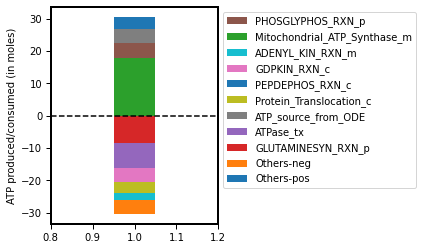

In [4]:
from sweetlovegroup.analysis import generateATPbudget
generateATPbudget(temp,sol.fluxes,day_or_night_tag="",outfile="temp.csv")

In [11]:
production ={"ATP synthesis":116.0612}
consumption={"Photosynthesis1":69.39673+37.04026,
             "Starch":1.334341+0.01226785,
             "Photorespiration":4.673303,
             "FBA":3.6166}

In [12]:
sum(production.values())-sum(consumption.values())

-0.01230185000001427

In [13]:
(69.39673+37.04026)

106.43699000000001

In [14]:
sum(production.values())/3

38.68706666666667

In [114]:
met=temp.metabolites.get_by_id("ATP_c")
met2 = temp.metabolites.get_by_id("aATP_c")
tot = 0
for rxn in met1.reactions:
    if round(sol.fluxes[rxn.id],5)!=0:
        if "TRNA_LIGASE" in rxn.id or rxn.id == "GDPKIN_RXN_c" or "Protein" in rxn.id:
            tot = tot+(sol.fluxes[rxn.id]*(rxn.metabolites[met1]+rxn.metabolites[met2]))
        else:
            print(rxn.id+"\t"+str(sol.fluxes[rxn.id]*(rxn.metabolites[met1]+rxn.metabolites[met2])))
        #print(rxn.id+"\t"+str(sol.fluxes[rxn.id]*(rxn.metabolites[met1]+rxn.metabolites[met2])))
        #print(rxn.reaction)
print(tot)

KeyError: <Metabolite aATP_c at 0x20182203550>

In [16]:
2.2887831957756637+4.792778084783411

7.081561280559074

In [17]:
met=temp.metabolites.get_by_id("AMMONIUM_c")
for rxn in met.reactions:
    if round(rxn.flux,3)!=0:
        print(rxn.id+"\t"+str(rxn.flux*rxn.metabolites[met]))
        #print(rxn.reaction)

NH3_pc	-7.800810835579782
ASNSYNA_RXN_c	-0.003448687583036928
NH3_mc	4.634472281966107
NH4_ec	3.1697872411967114


In [18]:
met=temp.metabolites.get_by_id("Pi_m")
for rxn in met.reactions:
    if round(rxn.flux,3)!=0:
        print(rxn.id+"\t"+str(rxn.flux*rxn.metabolites[met]))
        #print(rxn.reaction+"\n")

Pi_PROTON_mc	16.911867769605937
SUCCCOASYN_RXN_m	-1.1177098177317635
Mitochondrial_ATP_Synthase_m	-15.794157951874173


In [19]:
for rxn in temp.reactions:
    if len(rxn.reactants)==0 or len(rxn.products)==0:
        if round(rxn.flux,2)!=0:
            print(rxn.id+"\t"+str(rxn.flux))

H_tx	14.96947987350696
H2O_tx	-8.67918026696577
CO2_tx	-9.077312695305142
O2_tx	4.130051583895217
Pi_tx	-5.029275762843921
SO4_tx	0.03944913834160101
NH4_tx	3.169787241196712
unlProtHYPO_c	16.78495476110227
GAP_tx	5.0188
G3P_tx	0.010476
GLYCOLATE_tx	9.3466
GLYCERATE_tx	4.6733
Biomass_leaf_tx	0.018069911029468047
MAL_v_accumulation	0.09240203005434648
CIT_v_accumulation	-0.0752066799860259


In [20]:
temp.reactions.Plastidial_ATP_Synthase_p.reaction

'2.4 ADP_p + 14.0 PROTON_l + 3.0 Pi_p + 0.6 aADP_p --> 2.7 ATP_p + 11.3 PROTON_p + 3.0 WATER_p + 0.3 aATP_p'

In [21]:
rxn = Reaction("ATP source from ODE")
rxn.add_metabolites({temp.metabolites.get_by_id("ADP_p"):-0.8,
                     temp.metabolites.get_by_id("aADP_p"):-0.2,
                     temp.metabolites.get_by_id("Pi_p"):-1,
                     temp.metabolites.get_by_id("PROTON_p"):-0.9,
                     temp.metabolites.get_by_id("ATP_p"):0.9,
                     temp.metabolites.get_by_id("aATP_p"):0.1,
                     temp.metabolites.get_by_id("WATER_p"):1})


In [22]:
rxn.check_mass_balance()

{'charge': 6.661338147750939e-16,
 'H': -8.881784197001252e-16,
 'O': 1.1102230246251565e-15,
 'P': 2.220446049250313e-16}

In [23]:
met=temp.metabolites.get_by_id("S_ADENOSYLMETHIONINE_c")
for rxn in met.reactions:
    print(rxn.id+"\t"+str(rxn.flux*rxn.metabolites[met]))
    print(rxn.reaction)

RXN_8873_c	-0.0
0.42 CPD_7616_c + 0.2 PROTON_c + S_ADENOSYLMETHIONINE_c + 0.58 aCPD_7616_c --> ADENOSYL_HOMO_CYS_c + 0.62 VANILLIN_c + 0.38 aVANILLIN_c
RXN_5643_c	-0.0
0.88 CPD_5441_c + S_ADENOSYLMETHIONINE_c + 0.12 aCPD_5441_c --> ADENOSYL_HOMO_CYS_c + 0.94 PHOSPHORYL_CHOLINE_c + 0.06 PROTON_c + 0.06 aPHOSPHORYL_CHOLINE_c
S_ADENMETSYN_RXN_c	0.0
0.65 ATP_c + MET_c + WATER_c + 0.35 aATP_c --> 0.65 PPI_c + 0.7 PROTON_c + 0.7 Pi_c + S_ADENOSYLMETHIONINE_c + 0.35 aPPI_c + 0.3 aPi_c
RXN_5642_c	-0.0
0.88 CPD_406_c + S_ADENOSYLMETHIONINE_c + 0.12 aCPD_406_c --> ADENOSYL_HOMO_CYS_c + 0.88 CPD_5441_c + 0.12 aCPD_5441_c
ACETOSYRINGONE_BIOSYNTHESIS_c	-0.0
0.88 5_HYDROXY_ACETOVANILLONE_c + S_ADENOSYLMETHIONINE_c + 0.12 a5_HYDROXY_ACETOVANILLONE_c --> 0.56 ACETOSYRINGONE_c + ADENOSYL_HOMO_CYS_c + 0.32 PROTON_c + 0.44 aACETOSYRINGONE_c
RXN_3422_c	-0.0
5_HYDROXY_FERULIC_ACID_c + S_ADENOSYLMETHIONINE_c --> ADENOSYL_HOMO_CYS_c + SINAPATE_c
RXN_1104_c	-0.0
CPD_676_c + S_ADENOSYLMETHIONINE_c --> ADENOSYL

In [9]:
fout = open("TC_FBAfluxes_GROWINGFig5B.csv","w")
for rxn in temp.reactions:
    fout.write(rxn.id+"\t"+rxn.reaction+"\t"+str(rxn.flux)+"\n")
fout.close()

In [3]:
df3 = pd.DataFrame(data={"Light intensity":[1000],
                        "Vc":[27.69],
                        "Vo":[9.3454],
                        "VPGA":[0.010487],
                        "VT3P":[5.021],
                        "Vstarch":[1.3205],
                        "Vt_glycerate":[4.6727],
                        "Vt_glycolate":[9.3454]})

In [4]:
temp = cobra_model.copy()

PPFD = df3["Light intensity"][0]
#constrain maintenace
ATPase = (0.0049*1000) + 2.7851
temp.reactions.get_by_id("ATPase_tx").lower_bound = ATPase
temp.reactions.get_by_id("ATPase_tx").upper_bound = ATPase
temp.reactions.get_by_id("NADPHoxc_tx").lower_bound = ATPase/9
temp.reactions.get_by_id("NADPHoxc_tx").upper_bound = ATPase/9
temp.reactions.get_by_id("NADPHoxp_tx").lower_bound = ATPase/9
temp.reactions.get_by_id("NADPHoxp_tx").upper_bound = ATPase/9
temp.reactions.get_by_id("NADPHoxm_tx").lower_bound = ATPase/9
temp.reactions.get_by_id("NADPHoxm_tx").upper_bound = ATPase/9

#constraint TP flux
temp.reactions.get_by_id("GAP_tx").lower_bound = 0
temp.reactions.get_by_id("GAP_tx").upper_bound = 0
temp.reactions.get_by_id("G3P_tx").lower_bound = 0
temp.reactions.get_by_id("G3P_tx").upper_bound = 0

#constraint glycollate and glycerate fluxes flux
temp.reactions.get_by_id("GLYCOLATE_tx").lower_bound = 0
temp.reactions.get_by_id("GLYCOLATE_tx").upper_bound = 0
temp.reactions.get_by_id("GLYCERATE_tx").lower_bound = 0
temp.reactions.get_by_id("GLYCERATE_tx").upper_bound = 0

temp.reactions.get_by_id("2PGADEHYDRAT_RXN_p").lower_bound = 0
temp.reactions.get_by_id("2PGADEHYDRAT_RXN_p").upper_bound = 0

temp.reactions.get_by_id("G6P_Pi_pc").lower_bound=0
temp.reactions.get_by_id("G6P_Pi_pc").upper_bound=0

temp.reactions.get_by_id("G6P_Pi_pc").lower_bound=0
temp.reactions.get_by_id("G6P_Pi_pc").upper_bound=0

temp.metabolites.get_by_id("Starch_b").remove_from_model()
temp.reactions.get_by_id("Starch_biomass").lower_bound = df3["Vstarch"][0]
temp.reactions.get_by_id("Starch_biomass").upper_bound = df3["Vstarch"][0]

temp.reactions.get_by_id("MAL_v_accumulation").lower_bound = -0.71*df3["Vstarch"][0]
temp.reactions.get_by_id("MAL_v_accumulation").upper_bound = -0.71*df3["Vstarch"][0]

temp.reactions.get_by_id("CIT_v_accumulation").lower_bound = 0.56*df3["Vstarch"][0]
temp.reactions.get_by_id("CIT_v_accumulation").upper_bound = 0.56*df3["Vstarch"][0]

for rxn in cobra_model.reactions:
    if rxn.lower_bound == -1000:
        rxn.lower_boudn = -3000
    if rxn.upper_bound == 1000:
        rxn.upper_bound = 3000

temp.reactions.Phloem_output_tx.lower_bound = 0
temp.reactions.Phloem_output_tx.upper_bound = 0

#check if model works
temp.solver="glpk"
sol = flux_analysis.parsimonious.optimize_minimal_flux(temp)

rxn =  temp.reactions.get_by_id("Biomass_leaf_tx")
print("Biomass C accumulation rate ="+str(rxn.flux*595.7664799294965))
print("O2 uptake rate ="+str(sol.fluxes["O2_tx"]))

Read LP format model from file C:\Users\sanus\AppData\Local\Temp\tmpnbhb6jsk.lp
Reading time = 0.02 seconds
: 872 rows, 1824 columns, 9140 nonzeros
Biomass C accumulation rate =4.493546105466072
O2 uptake rate =3.3050875841809817


In [88]:
met = temp.metabolites.get_by_id("GLN_p")
for rxn in met.reactions:
    if round(sol.fluxes[rxn.id],5)!=0:
        print("----")
        print(rxn.id+"\t"+str(sol.fluxes[rxn.id]*rxn.metabolites[met]))
        print(rxn.reaction)

----
GLN_GLU_pc	-0.3275049493610837
GLN_p + GLT_c <=> GLN_c + GLT_p
----
ANTHRANSYN_RXN_p	-0.00023505936841751985
CHORISMATE_p + GLN_p <=> ANTHRANILATE_p + GLT_p + PROTON_p + PYRUVATE_p
----
GLUTAMATE_SYNTHASE_NADH_RXN_p	-1.1706045188647387
2_KETOGLUTARATE_p + GLN_p + NADH_p + PROTON_p --> 2.0 GLT_p + NAD_p
----
GLUTAMINESYN_RXN_p	1.49834452759424
AMMONIUM_p + 0.9 ATP_p + GLT_p + 0.1 aATP_p --> 0.8 ADP_p + GLN_p + 0.9 PROTON_p + Pi_p + 0.2 aADP_p


In [77]:
-0.2021437926884901-0.28021372129544064-0.074789056085867

-0.5571465700697977

In [ ]:
met1 = temp.metabolites.get_by_id("ATP_p")
met2 = temp.metabolites.get_by_id("aATP_p")
tot = 0
for rxn in met1.reactions:
    if round(sol.fluxes[rxn.id],5)!=0:
        if "TRNA_LIGASE" in rxn.id or rxn.id == "GDPKIN_RXN_c" or "Protein" in rxn.id:
            tot = tot+(sol.fluxes[rxn.id]*(rxn.metabolites[met1]+rxn.metabolites[met2]))
        else:
            print(rxn.id+"\t"+str(sol.fluxes[rxn.id]*(rxn.metabolites[met1]+rxn.metabolites[met2])))
        #print(rxn.id+"\t"+str(sol.fluxes[rxn.id]*(rxn.metabolites[met1]+rxn.metabolites[met2])))
        #print(rxn.reaction)
print(tot)

In [5]:
fout = open("TC_GROWINGfluxes_night.csv","w")
for rxn in temp.reactions:
    fout.write(rxn.id+"\t"+rxn.reaction+"\t"+str(rxn.flux)+"\n")
fout.close()